Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* I'm glad to say that you executed your project really well.
* Thank you for structuring the project. It's a pleasure to check such notebooks.
* There are a couple of things that need to be done before your project is complete, but they're pretty straightforward.
* While there's room for improvement, on the whole, your project is looking good.
* I believe you can easily fix it! Good luck!

### <font color='orange'>General feedback (review 2)</font>
* Thank you for correcting your project!
* All "needs fixing"blocks were corrected. Good job! But there is one more small bug.
* One more time and you'll have it!

### <font color='orange'>General feedback (review 2)</font>
* Thank you for correcting the project!
* Great that you've achieved required score!
* Keep up the good work. Good luck next!

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from joblib import dump
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for collecting all imports in the first cell!
</div>

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=0, parse_dates=[0])
data.sort_index(inplace=True)

display(data.head(10))

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


In [3]:
data = data.resample('1H').sum()

<div class="alert alert-block alert-success">
<b>Success:</b> Data loading was done correctly!
</div>

<div class="alert alert-block alert-danger">

<b>Needs fixing:</b> Resampling was done in the wrong way because the result of `data.resample('1H').sum()` was not saved.
</div>

 - Fixed!

<div class="alert alert-block alert-success">
<b>Success (review 2):</b> Well done!
</div>

In [4]:
def make_features(data, max_lag, rolling_1, rolling_2, rolling_3):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean_{}'.format(rolling_1)] = data['num_orders'].shift(1).rolling(rolling_1).mean()
    data['rolling_mean_{}'.format(rolling_2)] = data['num_orders'].shift(1).rolling(rolling_2).mean()
    data['rolling_mean_{}'.format(rolling_3)] = data['num_orders'].shift(1).rolling(rolling_3).mean()

<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if this function returns new dataframe instead of modifying a global variable.
</div>

In [5]:
make_features(data, 50, 10, 15, 20)
data.dropna(inplace=True)

data.head()

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50,rolling_mean_10,rolling_mean_15,rolling_mean_20
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-03 02:00:00,25,2018,3,3,5,108.0,163.0,72.0,119.0,101.0,...,12.0,6.0,43.0,66.0,71.0,85.0,124.0,95.9,82.266667,69.85
2018-03-03 03:00:00,64,2018,3,3,5,25.0,108.0,163.0,72.0,119.0,...,15.0,12.0,6.0,43.0,66.0,71.0,85.0,90.2,77.866667,70.55
2018-03-03 04:00:00,44,2018,3,3,5,64.0,25.0,108.0,163.0,72.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,88.3,79.733333,73.40
2018-03-03 05:00:00,15,2018,3,3,5,44.0,64.0,25.0,108.0,163.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,83.8,79.666667,73.30
2018-03-03 06:00:00,9,2018,3,3,5,15.0,44.0,64.0,25.0,108.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,80.4,77.733333,71.80


## Analysis

In [6]:
data.describe()

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50,rolling_mean_10,rolling_mean_15,rolling_mean_20
count,4366.000000,4366.0,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,...,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000,4366.000000
mean,84.670179,2018.0,5.534127,16.000458,2.999084,84.647962,84.634219,84.614292,84.606276,84.598259,...,83.638571,83.595740,83.552451,83.517865,83.484654,83.443426,83.431287,84.570683,84.517865,84.465586
std,45.075492,0.0,1.701856,8.772001,2.000229,45.040061,45.006979,44.993303,44.984055,44.978013,...,43.980298,43.964824,43.911682,43.865994,43.820535,43.734311,43.715688,29.686380,27.933872,26.884792
min,0.000000,2018.0,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,34.133333,39.550000
25%,54.000000,2018.0,4.000000,8.000000,1.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,62.900000,62.933333,63.400000
50%,78.000000,2018.0,6.000000,16.000000,3.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,80.600000,81.000000,80.800000
75%,108.000000,2018.0,7.000000,24.000000,5.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,100.900000,100.133333,100.037500
max,462.000000,2018.0,8.000000,31.000000,6.000000,462.000000,462.000000,462.000000,462.000000,462.000000,...,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,213.400000,193.533333,191.950000


Decomposed information for number of orders


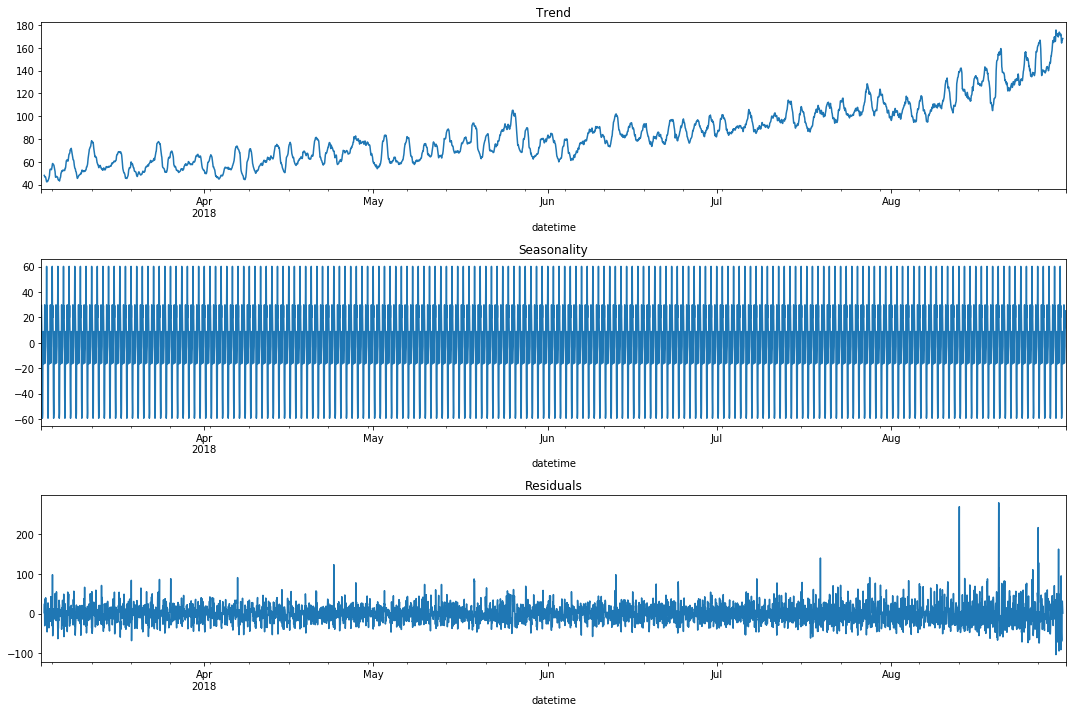

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(data)

plt.show()
print("Decomposed information for number of orders")
plt.figure(figsize=(15, 10))
plt.subplot(311)
decomposed.trend['num_orders'].plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['num_orders'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid['num_orders'].plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout() 


### Findings:
 - Number of orders trends upwards towards the end of the year.
 - Seasonality seems random.
 - Residuals look stable, except towards end of the year where it can vary.

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Please make seasonal decomposition, visualize trend and seasonality and provide some findings.
</div>

- Done!

<div class="alert alert-block alert-info">
<b>Improve: </b> In general, it's OK^ but it would be better if you've visualized seasonality on smaller interval (e.g one week). In this case you could see daily seasonality.
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> Othe findings (except seasonality) are absolutely right!
</div>

## Training

In [8]:
train_valid, test = train_test_split(data, shuffle=False, test_size=0.1)
train, valid = train_test_split(train_valid, shuffle=False, test_size=0.1)

print(train.index.min(), train.index.max())
print(valid.index.min(), valid.index.max())
print(test.index.min(), test.index.max())

features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']

features_valid = valid.drop('num_orders', axis=1)
target_valid = valid['num_orders']

features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

2018-03-03 02:00:00 2018-07-28 09:00:00
2018-07-28 10:00:00 2018-08-13 18:00:00
2018-08-13 19:00:00 2018-08-31 23:00:00


<div class="alert alert-block alert-success">
<b>Success:</b> Data was split correctly.
</div>

## Testing

In [9]:
def rmse(y, a):
    return mean_squared_error(y, a)**0.5

### Linear Regression Model

In [10]:
%%time
model = LinearRegression()
model.fit(features_train, target_train)

pred_valid = model.predict(features_valid)
pred_test = model.predict(features_test)


print("Valid RMSE using Linear Regression: ", rmse(pred_valid, target_valid))
print("Test RMSE using Linear Regression: ", rmse(pred_test, target_test))

Valid RMSE using Linear Regression:  31.372136973810864
Test RMSE using Linear Regression:  44.10736165414813
CPU times: user 138 ms, sys: 147 ms, total: 285 ms
Wall time: 238 ms


<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Score is incorrect becaause resampling wasn't done.
</div>

- Fixed!

<div class="alert alert-block alert-success">
<b>Success (review 2):</b> It's OK now.
</div>

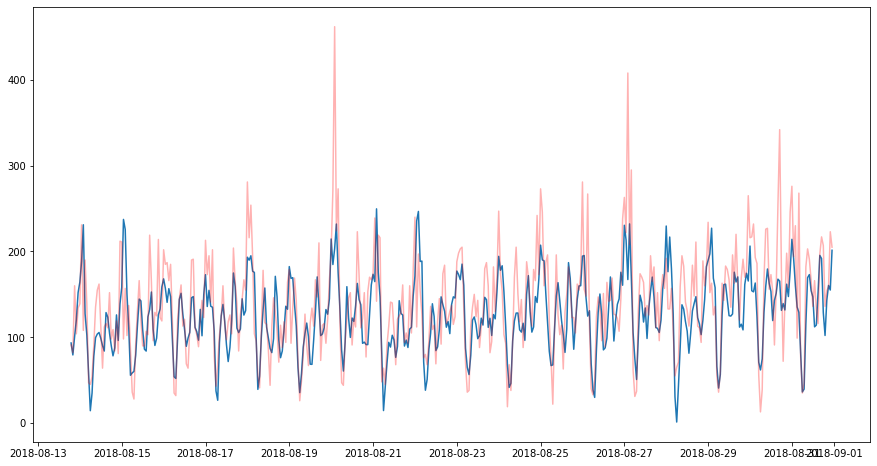

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(features_test.index, pred_test)
plt.plot(features_test.index, target_test, color='red', alpha=0.3)

### Tune using validation data

In [15]:
%%time
for n in range(10, 101, 10):
    print('# of n estimators:', n)
    model = RandomForestRegressor(n_estimators=n, max_depth= 10)
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    print('Valid RMSE:', rmse(predict_valid, target_valid))
    print()
    


# of n estimators: 10
Valid RMSE: 33.88415332173909

# of n estimators: 20
Valid RMSE: 33.435357027580736

# of n estimators: 30
Valid RMSE: 32.72448608089329

# of n estimators: 40
Valid RMSE: 32.327291146716256

# of n estimators: 50
Valid RMSE: 32.505997240681175

# of n estimators: 60
Valid RMSE: 32.77444793744121

# of n estimators: 70
Valid RMSE: 32.773901467348594

# of n estimators: 80
Valid RMSE: 32.87488254270063

# of n estimators: 90
Valid RMSE: 32.86625937149637

# of n estimators: 100
Valid RMSE: 32.380660469639274

CPU times: user 36.9 s, sys: 36 ms, total: 37 s
Wall time: 37 s


### Test Random Forest Model

In [16]:
# Now we use test data using optimal hyperparameters

model = RandomForestRegressor(n_estimators=40, max_depth= 10)


#features = pd.concat([features_train,features_valid], join = 'outer', sort=True)
#target = pd.concat([target_train, target_valid], join = 'outer', sort=True)

model.fit(features_train, target_train)


predict_test = model.predict(features_test)
print('Test RMSE:', rmse(predict_test, target_test))



Test RMSE: 46.33737666998599


<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Parameters tuning should be done on validation set or with the help of cross-validation. <a href="https://stackoverflow.com/questions/46732748/how-do-i-use-a-timeseriessplit-with-a-gridsearchcv-object-to-tune-a-model-in-sci"> Here is a good example</a>.
</div>

- Got it, thanks!

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Don't forget aboud testing.
</div>

- Sure, complete!

<div class="alert alert-block alert-danger">
<b>Needs fixing (review 2):</b> Don't forget that RMSE of the best model should be lower than 48. To achieve it, you could increase max_lag parameter and refit best model on union of train and valid set before testing.
</div>

 - OK, done!

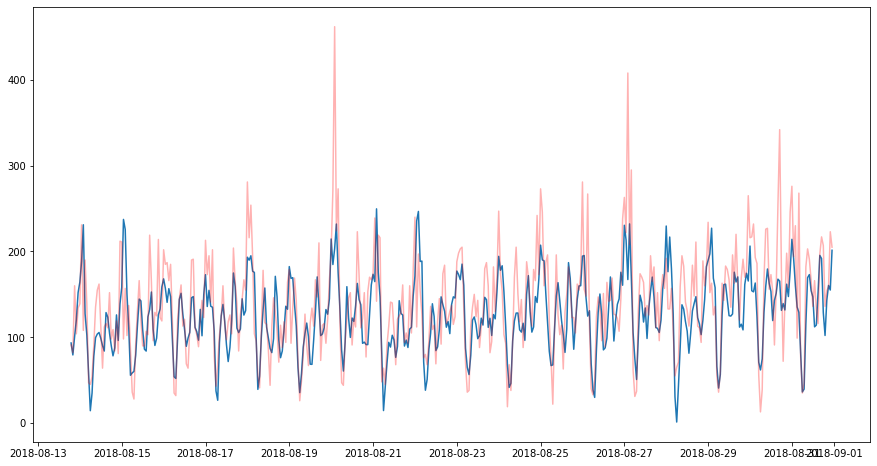

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(features_test.index, pred_test)
plt.plot(features_test.index, target_test, color='red', alpha=0.3)

## Conclusion:
- First we expanded the data by deriving more features. 
- The additional features added were: date (broken into year, month, day), 1 day lag, 2 day lag, and 2 day rolling mean.
- We parsed the dates, converted it to datetime, set it as the index, and then sorted it in ascending order.
- We then made 2 models:
    - Linear Regression, RMSE < 45, time to compute < 20 ms
    - Random Forest Regressor, RMSE < 48, time to compute < 40 seconds
- Both models worked successfully however Linear Regression works much faster.


<div class="alert alert-block alert-success">
<b>Success:</b> Glad to see well-structured conclusion at the end of the project!
</div>

# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48